In [4]:
library(tidyverse)
library(readxl)
library(knitr)
library(ggplot2)
library(lubridate)
library(plyr)

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following object is masked from 'package:lubridate':

    here

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:purrr':

    compact



In [5]:
install.packages("arules")

package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\11031\AppData\Local\Temp\RtmpaurQf6\downloaded_packages


In [6]:
install.packages("arulesViz")

also installing the dependencies 'lmtest', 'TSP', 'qap', 'gclus', 'registry', 'crosstalk', 'vcd', 'seriation', 'DT', 'plotly', 'visNetwork'



package 'lmtest' successfully unpacked and MD5 sums checked
package 'TSP' successfully unpacked and MD5 sums checked
package 'qap' successfully unpacked and MD5 sums checked
package 'gclus' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'crosstalk' successfully unpacked and MD5 sums checked
package 'vcd' successfully unpacked and MD5 sums checked
package 'seriation' successfully unpacked and MD5 sums checked
package 'DT' successfully unpacked and MD5 sums checked
package 'plotly' successfully unpacked and MD5 sums checked
package 'visNetwork' successfully unpacked and MD5 sums checked
package 'arulesViz' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\11031\AppData\Local\Temp\RtmpaurQf6\downloaded_packages


In [7]:
library(arules)
library(arulesViz)

Warning message:
"package 'arules' was built under R version 3.6.2"Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand


Attaching package: 'arules'

The following object is masked from 'package:dplyr':

    recode

The following objects are masked from 'package:base':

    abbreviate, write

Warning message:
"package 'arulesViz' was built under R version 3.6.2"Loading required package: grid
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


In [9]:
retail = read_excel("D:/Misc/Online Retail.xlsx")

In [10]:
retail = retail[complete.cases(retail),]

In [14]:
retail = retail %>% mutate(Description = as.factor(Description))
retail = retail %>% mutate(Country = as.factor(Country))

In [17]:
retail$Date = as.Date(retail$InvoiceDate)
retail$Time = format(retail$InvoiceDate, "%H:%M:%S")
retail$InvoiceNo = as.numeric(as.character(retail$InvoiceNo))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [18]:
glimpse(retail)

Observations: 406,829
Variables: 10
$ InvoiceNo   <dbl> 536365, 536365, 536365, 536365, 536365, 536365, 536365,...
$ StockCode   <chr> "85123A", "71053", "84406B", "84029G", "84029E", "22752...
$ Description <fct> WHITE HANGING HEART T-LIGHT HOLDER, WHITE METAL LANTERN...
$ Quantity    <dbl> 6, 6, 8, 6, 6, 2, 6, 6, 6, 32, 6, 6, 8, 6, 6, 3, 2, 3, ...
$ InvoiceDate <dttm> 2010-12-01 08:26:00, 2010-12-01 08:26:00, 2010-12-01 0...
$ UnitPrice   <dbl> 2.55, 3.39, 2.75, 3.39, 3.39, 7.65, 4.25, 1.85, 1.85, 1...
$ CustomerID  <dbl> 17850, 17850, 17850, 17850, 17850, 17850, 17850, 17850,...
$ Country     <fct> United Kingdom, United Kingdom, United Kingdom, United ...
$ Date        <date> 2010-12-01, 2010-12-01, 2010-12-01, 2010-12-01, 2010-1...
$ Time        <chr> "08:26:00", "08:26:00", "08:26:00", "08:26:00", "08:26:...


In [21]:
retail$Time = as.factor(retail$Time)
a = hms(as.factor(retail$Time))
retail$Time = hour(a)

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

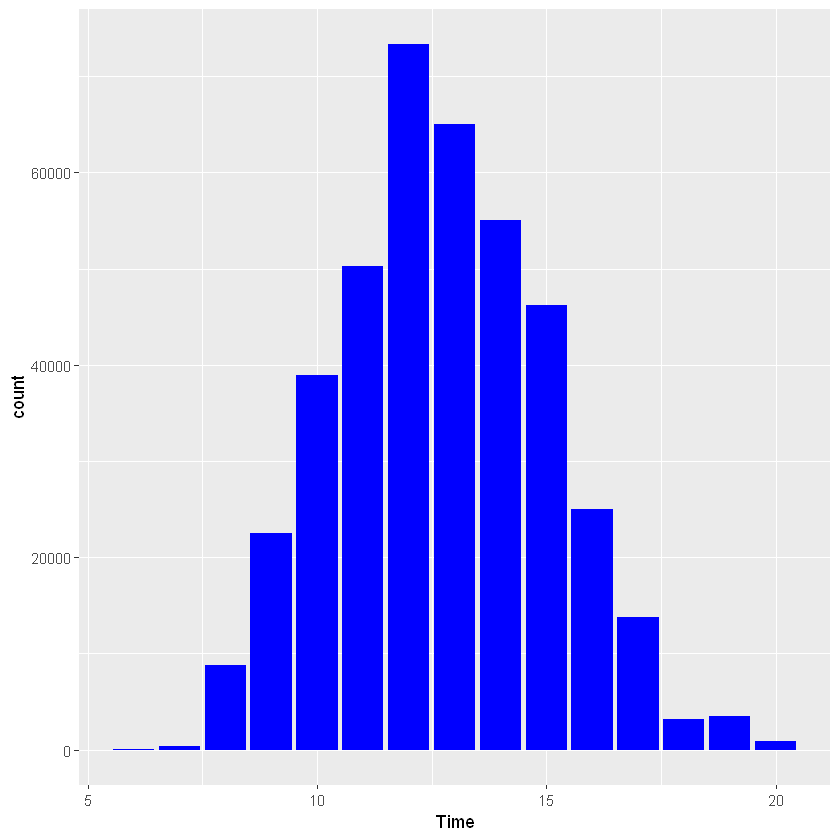

In [25]:
retail %>% ggplot(aes(x=Time)) + geom_histogram(stat="count", fill="blue") //Time of frequent purchase

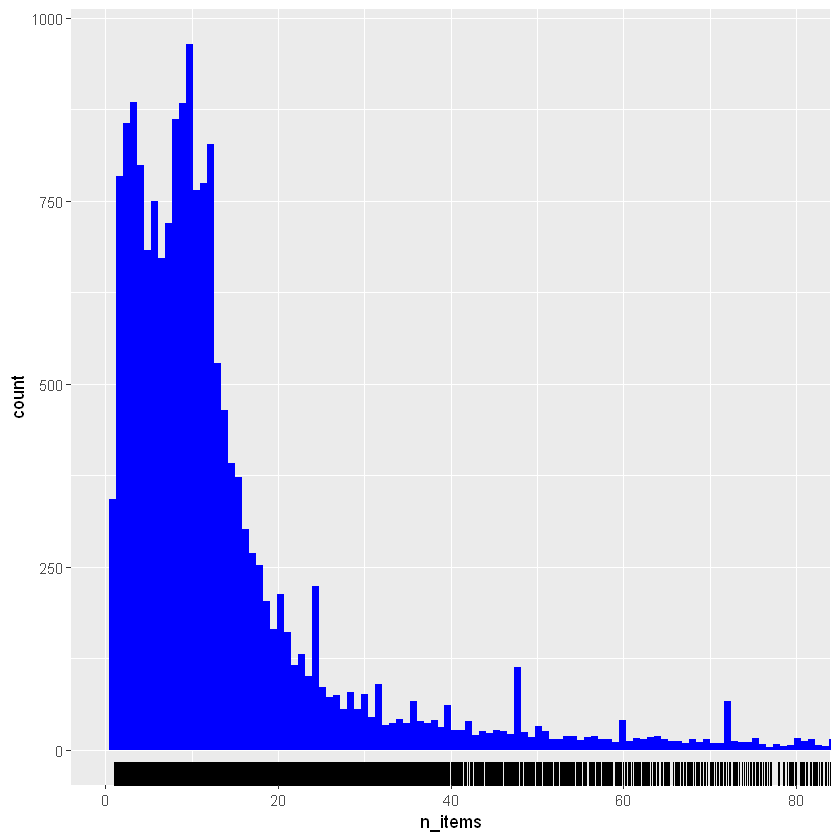

In [59]:
retail %>% group_by(InvoiceNo) %>% dplyr::summarize(n_items=mean(Quantity)) %>% ggplot (aes(x=n_items)) + geom_histogram(fill="blue",bins=100000) + geom_rug() +coord_cartesian(xlim=c(0,80)) // How many items each customer bought

In [37]:
tmp = retail %>% group_by(StockCode, Description) %>% dplyr::summarize(count=n()) %>% arrange(desc(count))

In [38]:
tmp = head(tmp, n=10) // Top 10 best sellers

In [39]:
tmp

StockCode,Description,count
85123A,WHITE HANGING HEART T-LIGHT HOLDER,2070
22423,REGENCY CAKESTAND 3 TIER,1905
85099B,JUMBO BAG RED RETROSPOT,1662
84879,ASSORTED COLOUR BIRD ORNAMENT,1418
47566,PARTY BUNTING,1416
20725,LUNCH BAG RED RETROSPOT,1358
22720,SET OF 3 CAKE TINS PANTRY DESIGN,1232
POST,POSTAGE,1196
20727,LUNCH BAG BLACK SKULL.,1126
21212,PACK OF 72 RETROSPOT CAKE CASES,1080


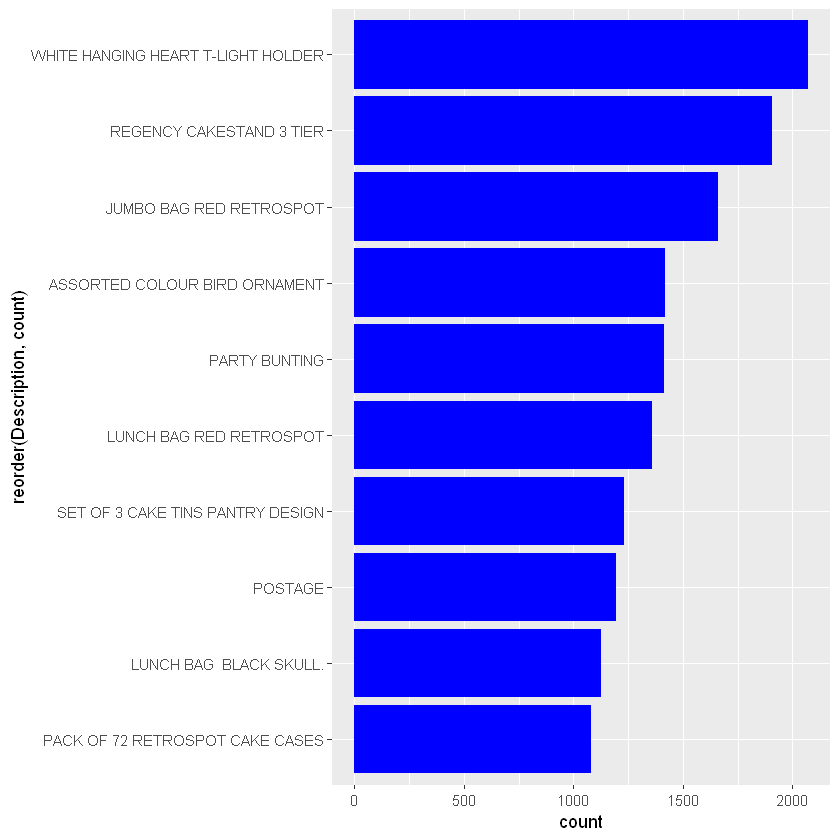

In [40]:
tmp %>% ggplot(aes(x=reorder(Description, count), y=count)) + geom_bar(stat="identity", fill="blue") + coord_flip()

In [42]:
retail_sorted = retail[order(retail$CustomerID),]
library(plyr)
itemList = ddply(retail, c("CustomerID", "Date"), function(df1)paste(df1$Description, collapse=","))

In [44]:
head(itemList, n=10)

CustomerID,Date,V1
12346,2011-01-18,"MEDIUM CERAMIC TOP STORAGE JAR,MEDIUM CERAMIC TOP STORAGE JAR"
12347,2010-12-07,"BLACK CANDELABRA T-LIGHT HOLDER,AIRLINE BAG VINTAGE JET SET BROWN,COLOUR GLASS. STAR T-LIGHT HOLDER,MINI PAINT SET VINTAGE,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,PINK DRAWER KNOB ACRYLIC EDWARDIAN,GREEN DRAWER KNOB ACRYLIC EDWARDIAN,RED DRAWER KNOB ACRYLIC EDWARDIAN,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,BLUE DRAWER KNOB ACRYLIC EDWARDIAN,ALARM CLOCK BAKELIKE CHOCOLATE,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE ORANGE,FOUR HOOK WHITE LOVEBIRDS,BLACK GRAND BAROQUE PHOTO FRAME,BATHROOM METAL SIGN,LARGE HEART MEASURING SPOONS,BOX OF 6 ASSORTED COLOUR TEASPOONS,BLUE 3 PIECE POLKADOT CUTLERY SET,RED 3 PIECE RETROSPOT CUTLERY SET,PINK 3 PIECE POLKADOT CUTLERY SET,EMERGENCY FIRST AID TIN,SET OF 2 TINS VINTAGE BATHROOM,SET/3 DECOUPAGE STACKING TINS,BOOM BOX SPEAKER BOYS,RED TOADSTOOL LED NIGHT LIGHT,3D DOG PICTURE PLAYING CARDS,BLACK EAR MUFF HEADPHONES,CAMOUFLAGE EAR MUFF HEADPHONES"
12347,2011-01-26,"PINK NEW BAROQUECANDLESTICK CANDLE,BLUE NEW BAROQUE CANDLESTICK CANDLE,BLACK CANDELABRA T-LIGHT HOLDER,WOODLAND CHARLOTTE BAG,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET WHITE,SANDWICH BATH SPONGE,ALARM CLOCK BAKELIKE CHOCOLATE,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE ORANGE,SMALL HEART MEASURING SPOONS,72 SWEETHEART FAIRY CAKE CASES,60 TEATIME FAIRY CAKE CASES,PACK OF 60 MUSHROOM CAKE CASES,PACK OF 60 SPACEBOY CAKE CASES,TEA TIME OVEN GLOVE,RED RETROSPOT OVEN GLOVE,RED RETROSPOT OVEN GLOVE DOUBLE,SET/2 RED RETROSPOT TEA TOWELS,REGENCY CAKESTAND 3 TIER,BOX OF 6 ASSORTED COLOUR TEASPOONS,MINI LADLE LOVE HEART RED,CHOCOLATE CALCULATOR,TOOTHPASTE TUBE PEN,SET OF 2 TINS VINTAGE BATHROOM,RED TOADSTOOL LED NIGHT LIGHT,3D DOG PICTURE PLAYING CARDS"
12347,2011-04-07,"AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE JET SET BROWN,RED RETROSPOT PURSE,ICE CREAM SUNDAE LIP GLOSS,VINTAGE HEADS AND TAILS CARD GAME,HOLIDAY FUN LUDO,TREASURE ISLAND BOOK BOX,WATERING CAN PINK BUNNY,RED DRAWER KNOB ACRYLIC EDWARDIAN,LARGE HEART MEASURING SPOONS,SMALL HEART MEASURING SPOONS,PACK OF 60 DINOSAUR CAKE CASES,RED RETROSPOT OVEN GLOVE DOUBLE,REGENCY CAKESTAND 3 TIER,ROSES REGENCY TEACUP AND SAUCER,RED TOADSTOOL LED NIGHT LIGHT,MINI PAINT SET VINTAGE,3D SHEET OF DOG STICKERS,3D SHEET OF CAT STICKERS,SMALL FOLDING SCISSOR(POINTED EDGE),GIFT BAG PSYCHEDELIC APPLES,SET OF 2 TINS VINTAGE BATHROOM"
12347,2011-06-09,"RABBIT NIGHT LIGHT,REGENCY TEA STRAINER,REGENCY TEA PLATE GREEN,REGENCY TEA PLATE PINK,REGENCY TEA PLATE ROSES,REGENCY TEAPOT ROSES,REGENCY SUGAR BOWL GREEN,REGENCY MILK JUG PINK,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE JET SET BROWN,VICTORIAN SEWING KIT,NAMASTE SWAGAT INCENSE,TRIPLE HOOK ANTIQUE IVORY ROSE,SMALL HEART MEASURING SPOONS,3D DOG PICTURE PLAYING CARDS,FEATHER PEN,COAL BLACK,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE CHOCOLATE"
12347,2011-08-02,"SET OF 60 VINTAGE LEAF CAKE CASES,SET 40 HEART SHAPE PETIT FOUR CASES,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE JET SET RED,AIRLINE BAG VINTAGE JET SET WHITE,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE WORLD CHAMPION,WOODLAND DESIGN COTTON TOTE BAG,WOODLAND CHARLOTTE BAG,ALARM CLOCK BAKELIKE RED,TRIPLE HOOK ANTIQUE IVORY ROSE,SINGLE ANTIQUE ROSE HOOK IVORY,TEA TIME OVEN GLOVE,72 SWEETHEART FAIRY CAKE CASES,60 TEATIME FAIRY CAKE CASES,PACK OF 60 DINOSAUR CAKE CASES,REGENCY CAKESTAND 3 TIER,REGENCY MILK JUG PINK,3D DOG PICTURE PLAYING CARDS,REVOLVER WOODEN RULER,VINTAGE HEADS AND TAILS CARD GAME,RED REFECTORY CLOCK"
12347,2011-10-31,"MINI LIGHTS WOODLAND MUSHROOMS,PINK GOOSE FEATHER TREE 60CM,MADRAS NOTEBOOK MEDIUM,AIRLINE BAG VINTAGE WORLD CHAMPION,AIRLINE BAG VINTAGE JET SET BROWN,AIRLINE BAG VINTAGE TOKYO 78,AIRLINE BAG VINTAGE JET SET RED,BIRDCAGE DECORATION TEALIGHT H

In [45]:
itemList$CustomerID = NULL
itemList$Date = NULL
colnames(itemList) = c("items")

In [46]:
write.csv(itemList, "marketbasket.csv", quote=FALSE, row.names=TRUE)

In [48]:
tr = read.transactions('marketbasket.csv', format='basket', sep=',')

summary(tr)

Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"EOF within quoted string"Warning message in scan(text

transactions as itemMatrix in sparse format with
 19297 rows (elements/itemsets/transactions) and
 27165 columns (items) and a density of 0.0006701659 

most frequent items:
WHITE HANGING HEART T-LIGHT HOLDER           REGENCY CAKESTAND 3 TIER 
                              1758                               1660 
           JUMBO BAG RED RETROSPOT                      PARTY BUNTING 
                              1434                               1271 
     ASSORTED COLOUR BIRD ORNAMENT                            (Other) 
                              1237                             343943 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1 2263 1189  851  768  725  662  618  597  582  554  572  506  487  508  504 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 503  449  413  477  420  383  304  313  270  237  253  223  204  222  216  171 
  33   34   35   3

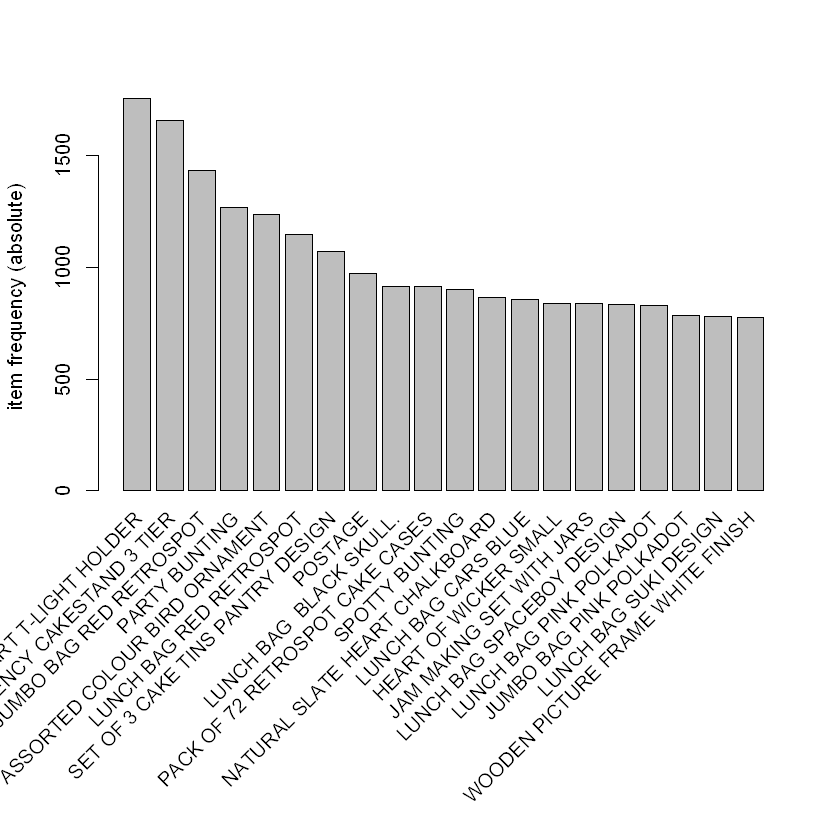

In [49]:
itemFrequencyPlot(tr, topN=20, type='absolute')

In [50]:
rules = apriori(tr, parameter=list(supp=0.001, conf=0.8))
rules = sort(rules, by='confidence', decreasing=TRUE)
summary(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 19 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[27165 item(s), 19297 transaction(s)] done [0.16s].
sorting and recoding items ... [2407 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(tr, parameter = list(supp = 0.001, conf = 0.8)):
"Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!"

 done [0.32s].
writing ... [87110 rule(s)] done [0.04s].
creating S4 object  ... done [0.04s].


set of 87110 rules

rule length distribution (lhs + rhs):sizes
    2     3     4     5     6     7     8     9    10 
  105  3133  9732 26228 29873 14020  3218   680   121 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   5.000   6.000   5.627   6.000  10.000 

summary of quality measures:
    support           confidence          lift             count       
 Min.   :0.001036   Min.   :0.8000   Min.   :  8.781   Min.   : 20.00  
 1st Qu.:0.001088   1st Qu.:0.8333   1st Qu.: 19.305   1st Qu.: 21.00  
 Median :0.001192   Median :0.8750   Median : 24.786   Median : 23.00  
 Mean   :0.001383   Mean   :0.8834   Mean   : 50.921   Mean   : 26.69  
 3rd Qu.:0.001503   3rd Qu.:0.9231   3rd Qu.: 43.662   3rd Qu.: 29.00  
 Max.   :0.018086   Max.   :1.0000   Max.   :622.484   Max.   :349.00  

mining info:
 data ntransactions support confidence
   tr         19297   0.001        0.8

In [51]:
inspect(rules[1:10])

     lhs                         rhs             support     confidence
[1]  {WOBBLY CHICKEN}         => {DECORATION}    0.001451003 1         
[2]  {WOBBLY CHICKEN}         => {METAL}         0.001451003 1         
[3]  {DECOUPAGE}              => {GREETING CARD} 0.001191895 1         
[4]  {BILLBOARD FONTS DESIGN} => {WRAP}          0.001502824 1         
[5]  {WOBBLY RABBIT}          => {DECORATION}    0.001761932 1         
[6]  {WOBBLY RABBIT}          => {METAL}         0.001761932 1         
[7]  {BLACK TEA}              => {SUGAR JARS}    0.002331969 1         
[8]  {BLACK TEA}              => {COFFEE}        0.002331969 1         
[9]  {ART LIGHTS}             => {FUNK MONKEY}   0.001969218 1         
[10] {FUNK MONKEY}            => {ART LIGHTS}    0.001969218 1         
     lift      count
[1]  385.94000 28   
[2]  385.94000 28   
[3]  344.58929 23   
[4]  622.48387 29   
[5]  385.94000 34   
[6]  385.94000 34   
[7]  212.05495 45   
[8]   61.06646 45   
[9]  507.81579 38  

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


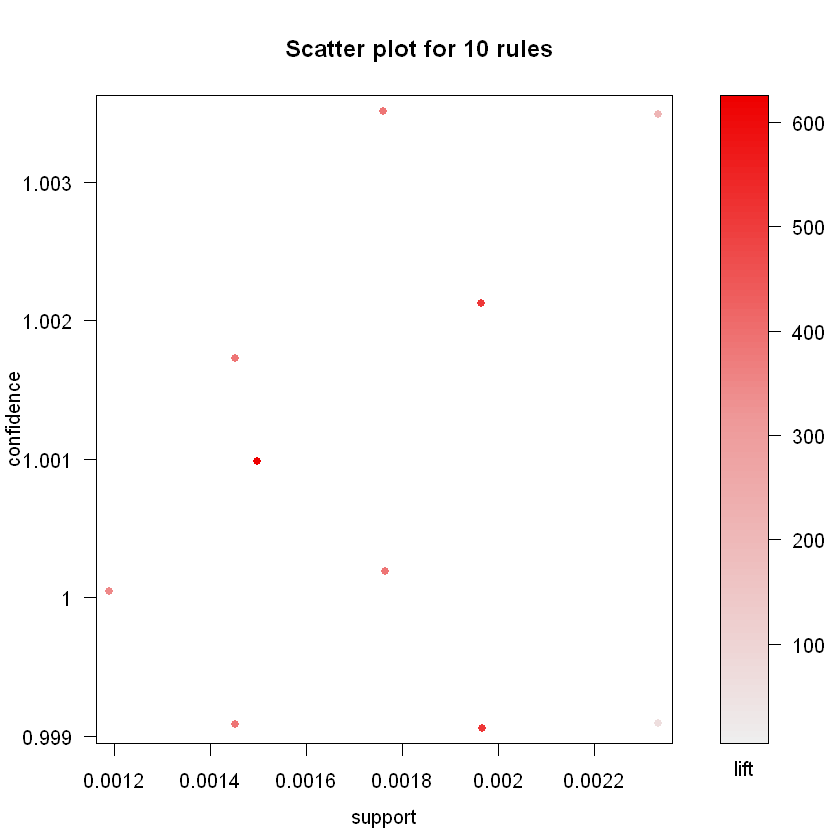

In [52]:
toprules = rules[1:10]
plot(toprules)

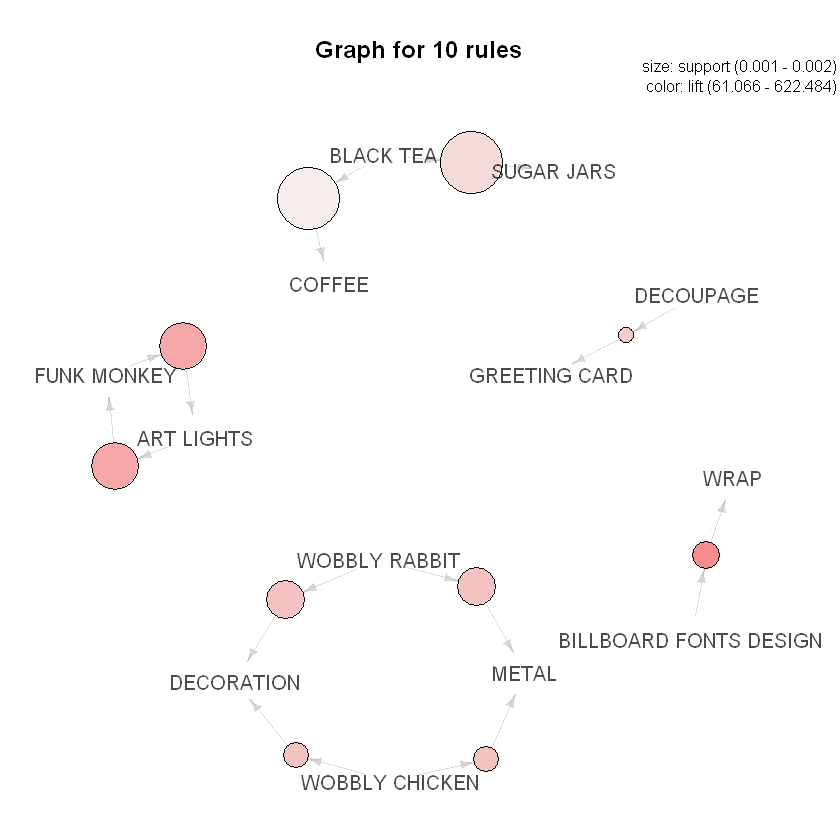

In [53]:
plot(toprules, method="graph")

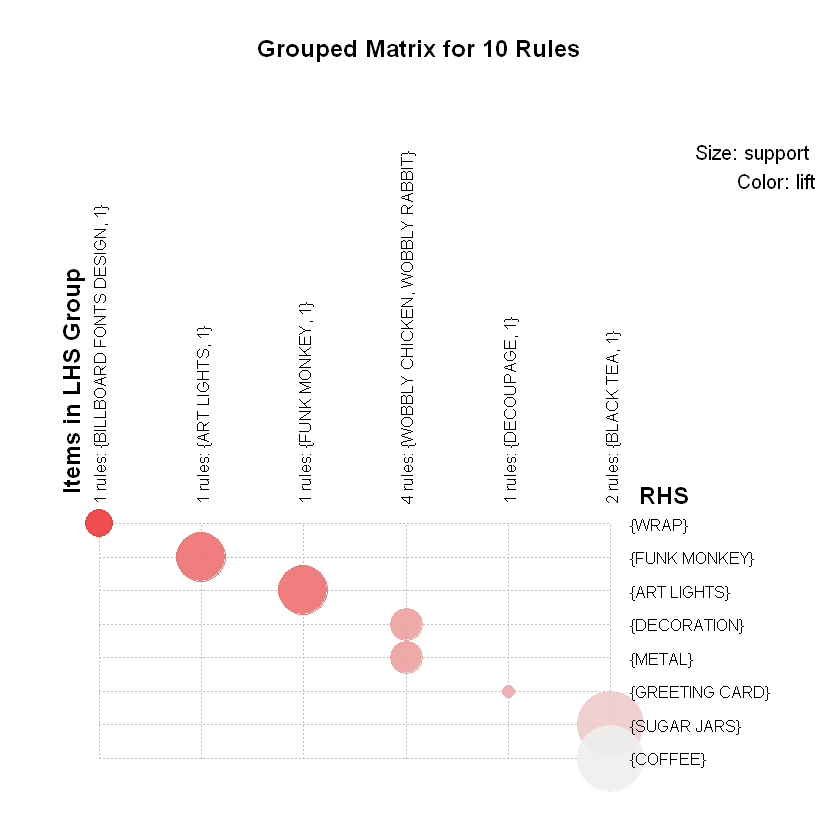

In [54]:
plot(toprules, method="grouped")